<a href="https://colab.research.google.com/github/anruki/PID-sistema-de-control/blob/main/simulationpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SISTEMAS DE CONTROL – INGENIERÍA MATEMÁTICA
## Inverted Pendulum Stabilization using PID Control `[Proyecto Final]`


Firstly, we install the `control` package in Python, which provides tools for control systems analysis and design.

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 4.3 MB/s eta 0:00:00


**1.   MODELING**



To model an inverted pendul system, we must define its transfer function given by:
$$ G(s) = \frac{1}{s^2 - \frac{g}{l}} $$


In [2]:
import numpy as np
import control as ctrl
g = 9.81 # gravity (m/s^2)
l = 1.0 # length of the pendulum (m)
m = 1.0 # mass of the pendulum (kg)
# Transfer function G(s) = 1 / (s^2 - g/l)
num = [1]
den = [1, 0, -g/l]
G = ctrl.TransferFunction(num, den)


The transfer function is the result of linearalising and applying Laplace to the equations of motion of the inverted pendulum.

**2.   STABILITY ANALISIS**

The roots of the denominator of the transfer function G determine the stability of the system. Pyhon function `poles()` obtains these roots.

In [3]:
poles = ctrl.poles(G)
print("Poles of the system:", poles)

Poles of the system: [-3.13209195+0.j  3.13209195+0.j]


For our system, we have obtained the poles printed above, we identify that one of them is positive.

According to the principle of Routh-Hurwitz, in order for a linear system to be stable, all of its poles must have negative real parts, that is they must all lie within the left-half of the s-plane.

Therefore, the system is unstable.

**Determine the range of system parameters for which the system is sta-
ble**

**3. PID CONTROLLER DESIGN**

In [4]:
Kp = 10.0
Ki = 1.0
Kd = 2.0
# PID controller
controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])


to stabilize the inverted pendulum. They
will determine the gains (Kp, Ki, Kd) using techniques like Ziegler-Nichols or
by manually tuning the gains to achieve the desired performance

**4. SIMULATION**

We observe the response of the system to different
initial conditions and disturbances.

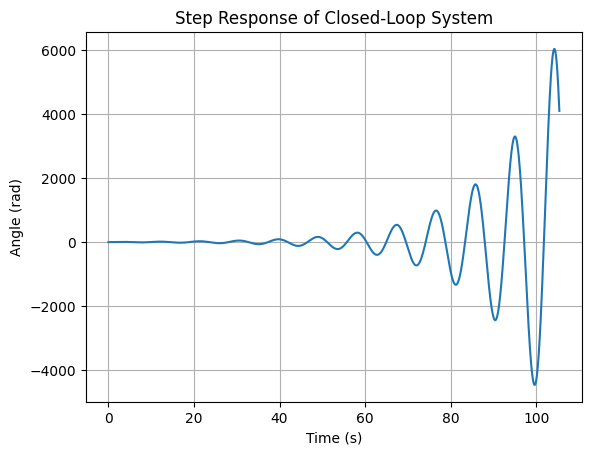

In [5]:
import matplotlib.pyplot as plt
# Closed-loop system
closed_loop = ctrl.feedback(G * controller)
# Time response
t, y = ctrl.step_response(closed_loop)
# Plotting
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Step Response of Closed-Loop System')
plt.grid(True)
plt.show()


**5. PERFORMANCE ANALYSIS**

Students will analyze the performance of the controlled system in terms of set-
tling time, overshoot, and steady-state error. They will also investigate the
robustness of the controller to parameter variations and noise.

**6. VISUALIZATION**



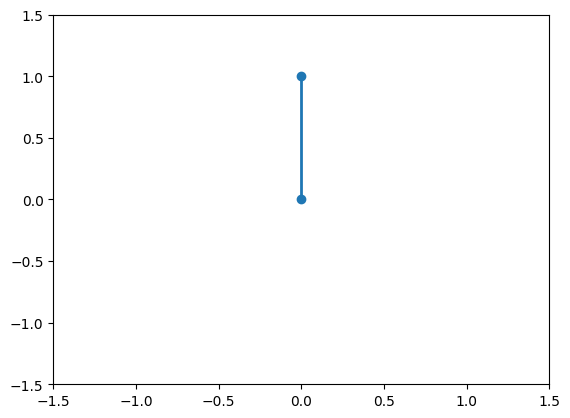

In [6]:
import matplotlib.animation as animation
def animate(i):
  line.set_data([0, np.sin(y[i])], [0, np.cos(y[i])])
  return line,
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
line, = ax.plot([], [], 'o-', lw=2)
ani = animation.FuncAnimation(fig, animate, frames=len(y), interval=50, blit=True)
plt.show()